In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [5]:
def get_normal_samples(
    n_points: int,
    expected_n_clusters: int,
    sample_size: int,
    scale_factor: int = 2,
):
    """
    Get a sample of n_clusters options from a normal distribution around expected_n_clusters.

    Notes:
    - If expected_n_clusters is greater than n_points, it is set to n_points.
    - If expected_n_clusters is less than 1, it is set to 1.
    - Sigma of the distribution is proportional to `expected_n_clusters` 
        (as in `expected_n_clusters/scale_factor`) to capture the idea that higher `expected_n_clusters` 
        are probably less accurate and we should try a wider range of possible values.
    - The scale_factor is set to 5 to get a distribution that is not too narrow nor too wide.
    - Number of samples is not guaranteed to be `sample_size`, since in edge cases the function will
        filter out all options with a probability of 0 to avoid errors in np.random.choice().
    """

    if expected_n_clusters > n_points:
        expected_n_clusters = n_points
    if expected_n_clusters < 1:
        expected_n_clusters = 1

    # get list of all n_clusters options
    all_options = np.arange(1, n_points + 1)

    # get normal distribution around expected_n_clusters to pick from
    mu = expected_n_clusters
    sigma = expected_n_clusters / scale_factor
    p = norm.pdf(all_options, loc=mu, scale=sigma)
    # normalize the probabilities as required by np.random.choice()
    p_scaler = 1 / p.sum()
    p = p * p_scaler

    # filter out all options with a probability of 0 to avoid errors in np.random.choice()
    non_zero_filter = p > 0
    non_zero_p = p[non_zero_filter]
    non_zero_options = all_options[non_zero_filter]

    # select options
    sample_size = min(len(non_zero_options), sample_size)
    selected_choices = np.random.choice(
        non_zero_options, size=sample_size, p=non_zero_p, replace=False
    )
    selected_choices = np.sort(selected_choices)

    # plots
    f, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].plot(non_zero_options, non_zero_p)
    axes[0].axvline(
        x=expected_n_clusters, color="r", linestyle="--", label="expected_n_clusters"
    )
    axes[0].set_title(
        f"NEW METHOD\n"
        f"Distribution around expected_n_clusters"
    )

    axes[1].plot(
        range(1, len(selected_choices) + 1), selected_choices, "o", markersize=3
    )
    axes[1].axhline(
        y=expected_n_clusters, color="r", linestyle="--", label="expected_n_clusters"
    )
    axes[1].set_title(
        f"NEW METHOD\n"
        f"Returned samples from distribution: {sample_size}"
    )
    axes[1].legend()

    # old method
    scale_factor = 2
    max_n_clusters = max(expected_n_clusters * scale_factor, scale_factor)
    if n_points < max_n_clusters:
        max_n_clusters = n_points
        min_n_clusters = max(1, max_n_clusters // 4)
    else:
        min_n_clusters = max(expected_n_clusters // scale_factor, 1)
    old_choices = list(range(min_n_clusters, max_n_clusters + 1))

    axes[2].plot(range(1, len(old_choices) + 1), old_choices, "o", markersize=1)
    axes[2].axhline(
        y=expected_n_clusters, color="r", linestyle="--", label="expected_n_clusters"
    )
    axes[2].set_title(
        f"OLD METHOD\n"
        f"Returned samples: {sample_size}\n"
        f"(Every value from expected/2 to expected*2)"
    )

    plt.suptitle(
        f"n_points={n_points}, requested_sample_size={sample_size}, expected_n_clusters={expected_n_clusters} and resulting sigma={sigma}"
    )
    plt.tight_layout()
    # plt.savefig(f"normal_samples_{sigma}.png")

    return selected_choices

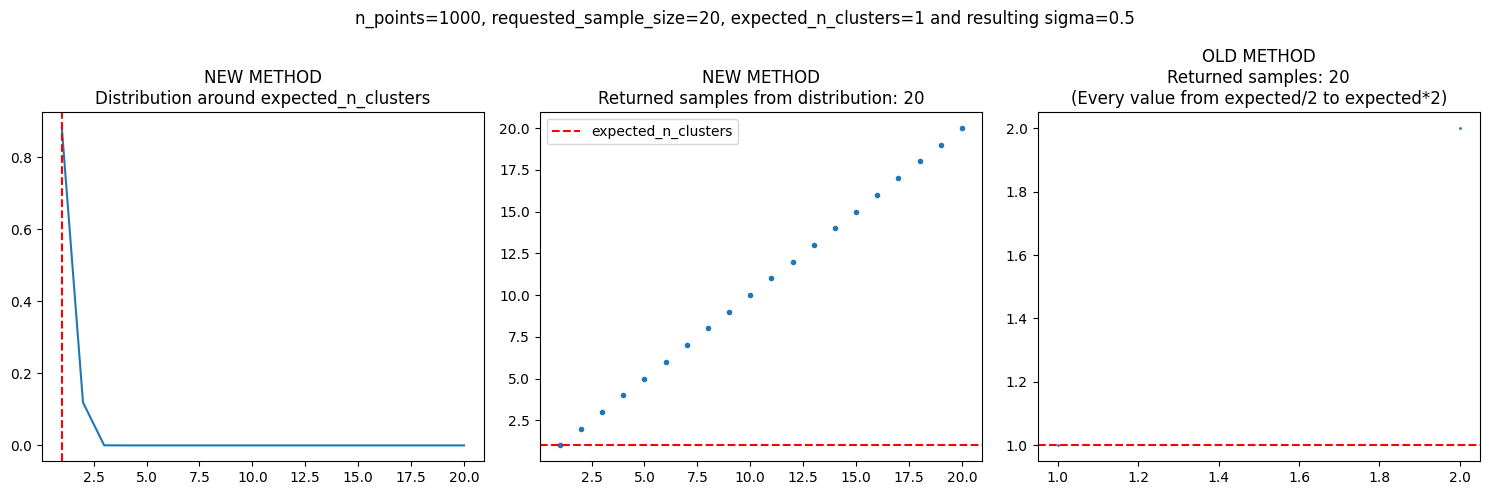

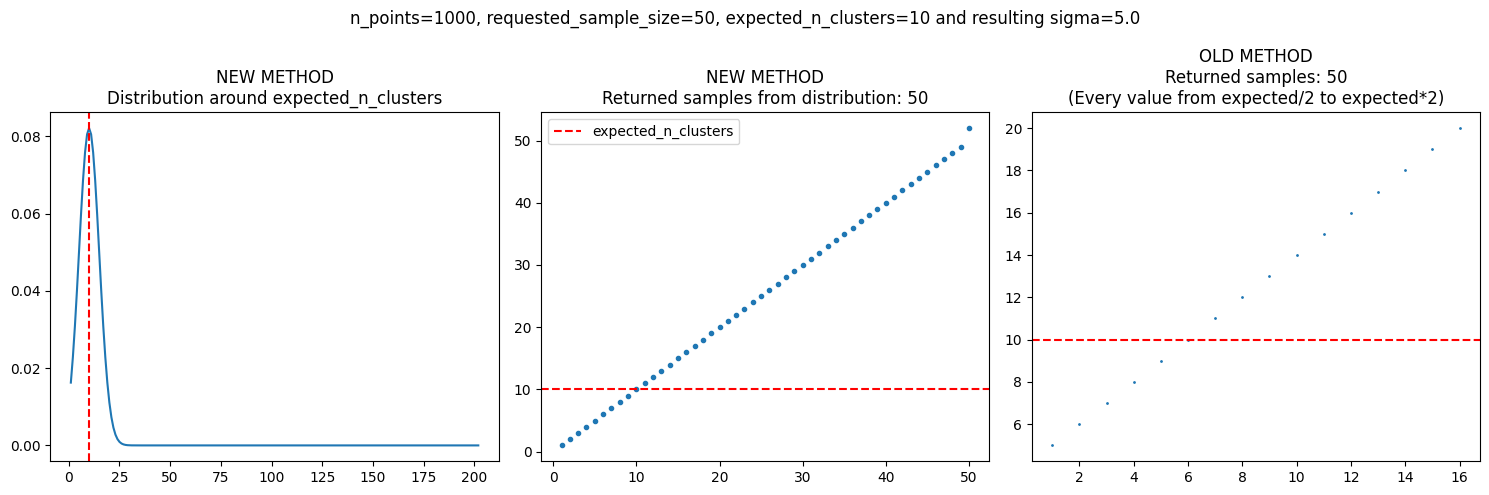

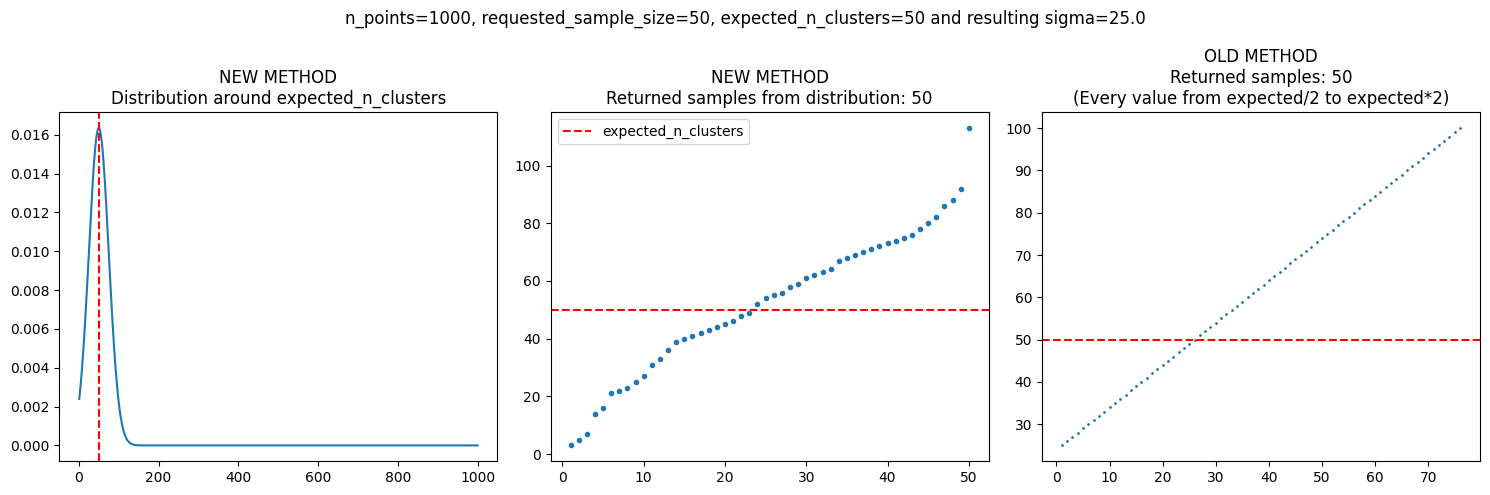

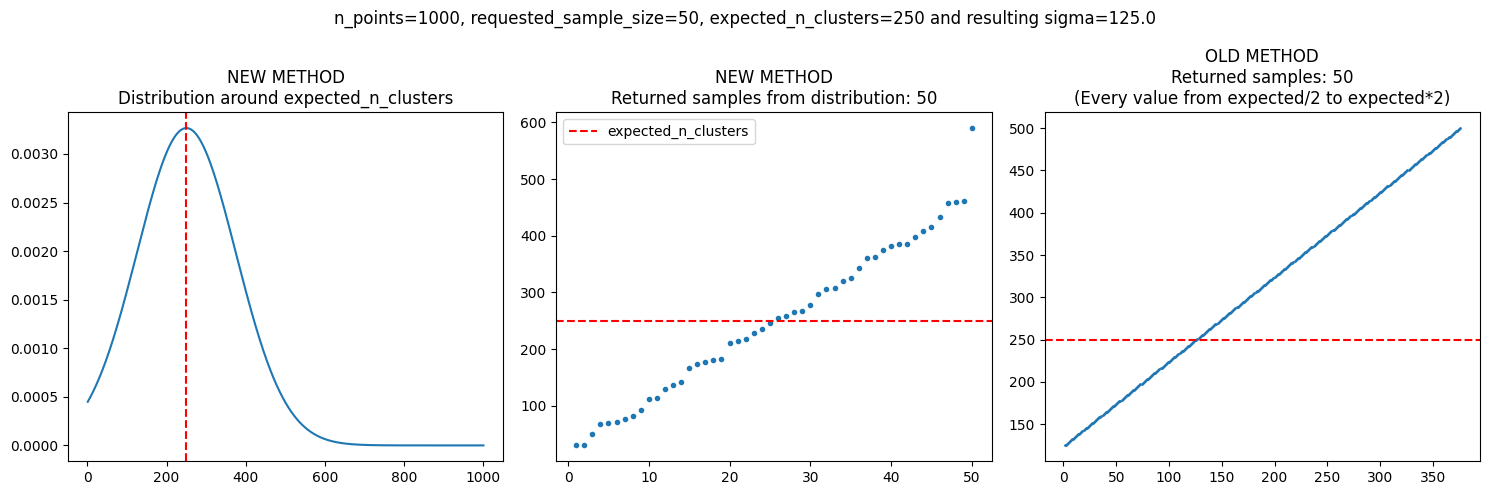

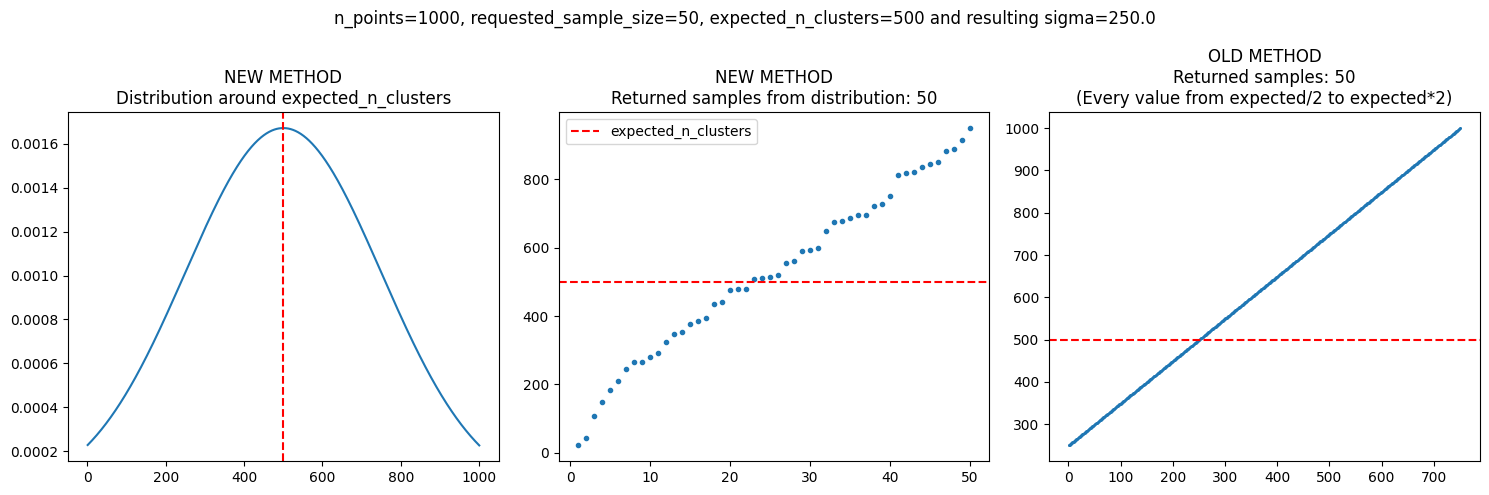

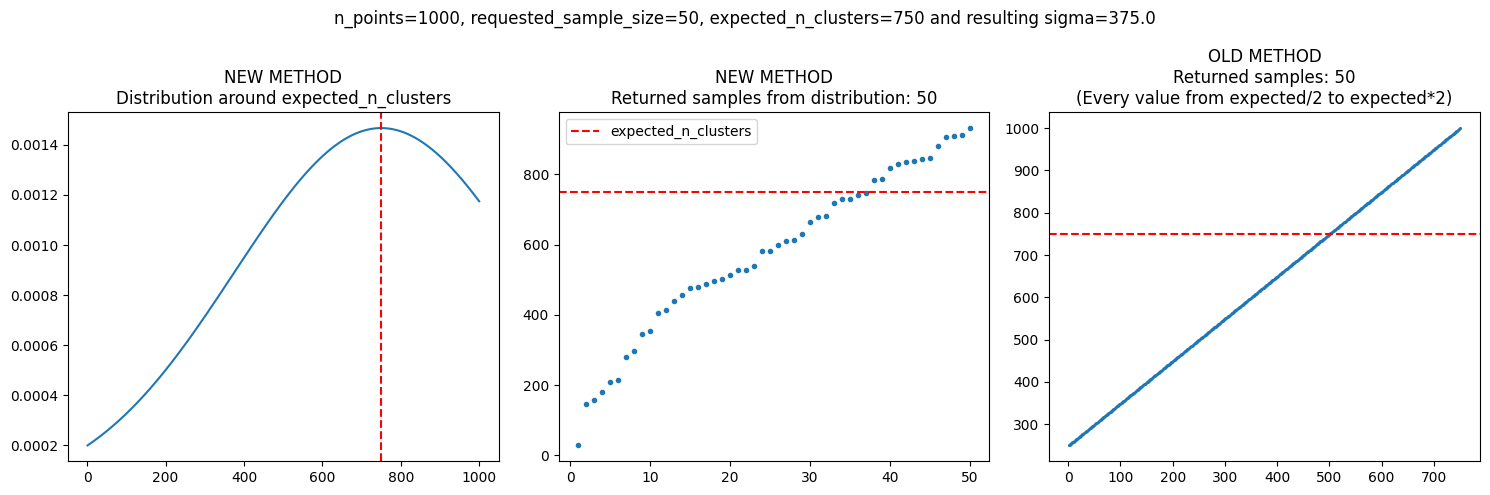

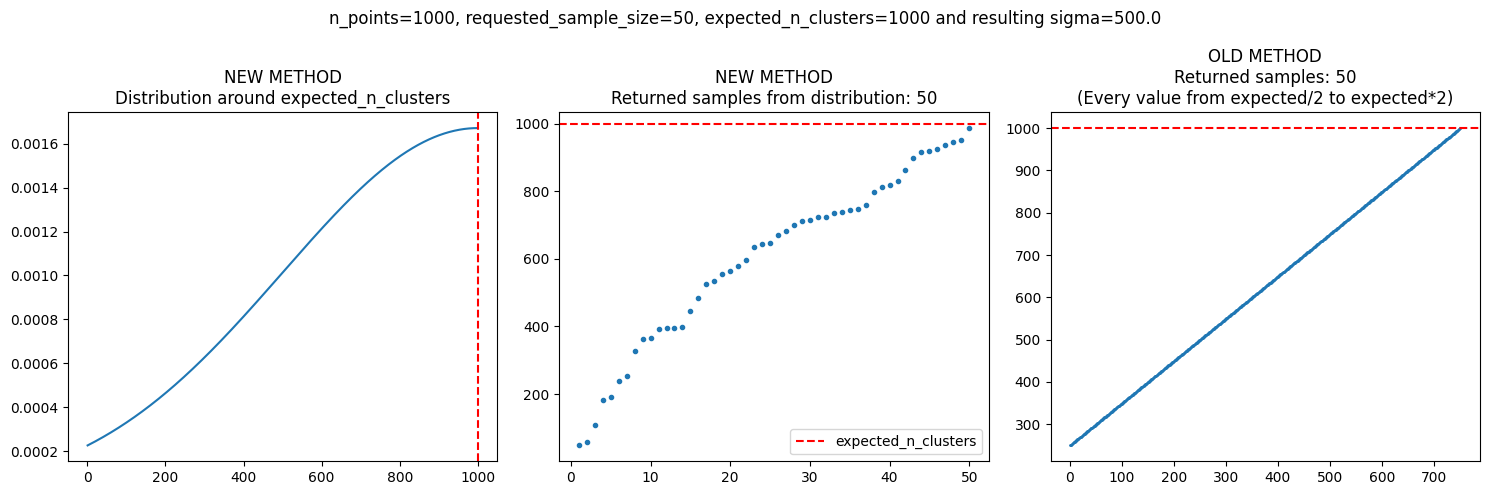

In [6]:
for i in [1, 10, 50, 250, 500, 750, 1000]:
    selected_choices = get_normal_samples(
        n_points=1000,
        expected_n_clusters=i,
        sample_size=50,
    )
    plt.show()

In [ ]:
selected_choices = get_normal_samples(
    n_points=100,
    expected_n_clusters=95,
    sample_size=40,
)
selected_choices